In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


In [2]:
loadDir = 'result_dump'
saveDir = 'figures'

# keys are axis 0, nodes axis 1, iterations axis 2
countTensor = np.load('{}/countTensor.npy'.format(loadDir))
countMatrix = np.mean(countTensor, axis =2)
print(countTensor.shape)
print(countTensor)

(5, 5, 2)
[[[3.017 2.796]
  [3.406 3.373]
  [3.863 3.837]
  [4.325 4.41 ]
  [4.896 4.905]]

 [[2.903 3.002]
  [3.504 3.374]
  [3.875 3.951]
  [4.47  4.376]
  [4.841 4.791]]

 [[3.092 2.868]
  [3.36  3.296]
  [3.875 3.83 ]
  [4.246 4.396]
  [4.891 4.793]]

 [[2.818 3.063]
  [3.42  3.366]
  [3.926 3.834]
  [4.418 4.334]
  [4.816 4.874]]

 [[2.926 3.097]
  [3.515 3.281]
  [3.86  3.871]
  [4.426 4.397]
  [4.929 4.935]]]


FileNotFoundError: [Errno 2] No such file or directory: 'figures/imshow_count_matrix.png'

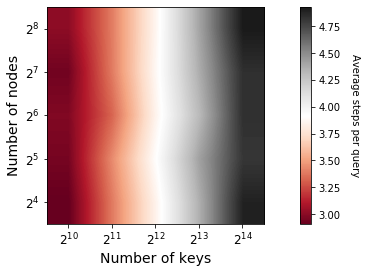

In [3]:
fs = 14
fd = {'fontsize': 12}
im = plt.imshow(countMatrix, aspect = 'equal', origin = 'lower', interpolation='bilinear', cmap='RdGy')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size='5%', pad=0.5)
cbar = plt.colorbar(im, cax=cax, ax=ax)
cbar.set_label('Average steps per query', rotation=270, labelpad=20)
ax.set_xticks([x for x in range(countMatrix.shape[0])])
ax.set_xticklabels(["$2^{"+ str(x) + "}$" for x in range(10, 15)], fd)
ax.set_yticks([x for x in range(countMatrix.shape[1])])
ax.set_yticklabels(["$2^{"+ str(x) + "}$" for x in range(4, 9)], fd)
ax.set_xlabel("Number of keys", fontsize = fs)
ax.set_ylabel("Number of nodes", fontsize = fs)
plt.savefig('{}/imshow_count_matrix.png'.format(saveDir))

In [ ]:
meanSteps = np.mean(countTensor[-1, :, :], axis = -1)
print(meanSteps)
semSteps = np.std(countTensor[-1, :, :], axis = -1) / np.sqrt(countTensor.shape[-1])
print(semSteps)
plt.errorbar([2**x for x in range(4, 9)], meanSteps, fmt = 'ko', yerr = semSteps, markersize = 4)
ax = plt.gca()
ax.set_xscale('log', basex = 2)
ax.set_xlabel('Number of nodes', fontsize = fs)
ax.set_ylabel('Average steps per query', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('{}/bar_count_matrix.png'.format(saveDir))